# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np

## Import Movie Lens Data Base

In [2]:
#importar databasese Movie Lens e checar tamanhos
data_path = '../raw_data/ml-25m/'
g_scores = pd.read_csv(data_path + 'genome-scores.csv')#, nrows = 1000000)
g_tags = pd.read_csv(data_path +'genome-tags.csv')#, nrows = 1000000)
links = pd.read_csv(data_path + 'links.csv')
movies = pd.read_csv(data_path + 'movies.csv')
ratings = pd.read_csv(data_path + 'ratings.csv') #nrows = 1000000)
tags = pd.read_csv(data_path + 'tags.csv')

In [3]:
print(f'Formato da base g_scores:',(g_scores.shape))
print(f'Formato da base g_tags:',(g_tags.shape))
print(f'Formato da base links:',(links.shape))
print(f'Formato da base movies:',(movies.shape))
print(f'Formato da base ratings:',(ratings.shape))
print(f'Formato da base tags:',(tags.shape))

Formato da base g_scores: (15584448, 3)
Formato da base g_tags: (1128, 2)
Formato da base links: (62423, 3)
Formato da base movies: (62423, 3)
Formato da base ratings: (25000095, 4)
Formato da base tags: (1093360, 4)


## Análise exploratória Movie Lens Data Base

### Genome-scores:


In [4]:
g_scores.head(4)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575


In [5]:
print(g_scores.isnull().sum())
g_scores.info()

movieId      0
tagId        0
relevance    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


### Genome-tags:

In [6]:
g_tags.head(4)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s


In [7]:
print(g_tags.isnull().sum())
g_tags.info()

tagId    0
tag      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


### Links:

In [8]:
links.head(4)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0


In [9]:
print(links.isnull().sum())
links.info()

movieId      0
imdbId       0
tmdbId     107
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


### Movies:

In [10]:
movies.head(4)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [11]:
print(movies.isnull().sum())
movies.info()

movieId    0
title      0
genres     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


### Ratings:

In [12]:
ratings.head(4)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820


In [13]:
print(ratings.isnull().sum())
ratings.info()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


### Tags:


In [14]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [15]:
print(tags.isnull().sum())
tags.info()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


We can exclude 16 tags because we have 1093360 tags on the movies

Which movies don't have tags?

### Movies without TMDB ID

In [16]:
#criação de dataframe missing_movies
missing_movies = links.copy()
#criação de campo 'empty' no dataframe
missing_movies['empty'] = missing_movies.tmdbId.notnull()
#check a na quantidade de valores sem tmdbId
print(missing_movies['empty'].value_counts())
missing_movies = missing_movies[missing_movies['empty'] == False]
missing_movies = missing_movies.merge(movies,on='movieId')
missing_movies.head(5)

True     62316
False      107
Name: empty, dtype: int64


,movieId,imdbId,tmdbId,empty,title,genres
0,721,114103,NaN,False,Halfmoon (Paul Bowles - Halbmond) (1995),Drama
1,730,125877,NaN,False,Low Life (1994),Drama
2,770,38426,NaN,False,Costa Brava (1946),Drama
3,791,113610,NaN,False,"Last Klezmer: Leopold Kozlowski, His Life and ...",Documentary
4,1107,102336,NaN,False,Loser (1991),Comedy


We can exclude the 107 movies that don't have tmdbId!

### Tags without movies

In [17]:
movie_ids_without_tags = tags[tags.tag.isnull()].movieId.count()

In [18]:
print(f'Tags without movies: {movie_ids_without_tags}')

Tags without movies: 16


We can exclude 16 entries from Tags as they are non significant

### Standardizing movie genres:


In [19]:
movies = movies.copy()
movies['genres'] = movies['genres'].str.replace("|"," ")

In [20]:
#função para transformar string em lista 
def movie_genres(x):
    # remover (no genres listed) 
    if x == '(no genres listed)':
        return ""
    else:
        return x.split()   

In [21]:
movies['genres'] = movies['genres'].apply(movie_genres)
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"


In [22]:
movies.head(4)

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"


In [23]:
test = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
test = [genre.lower() for genre in test]
test

['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'film-noir',
 'horror',
 'imax',
 'musical',
 'mystery',
 'romance',
 'sci-fi',
 'thriller',
 'war',
 'western']

In [24]:
from sklearn.preprocessing import MultiLabelBinarizer

labels = movies['genres']
mlb = MultiLabelBinarizer()
results = mlb.fit_transform(labels)
print(mlb.classes_)
col = list(mlb.classes_)
col = [genre.lower() for genre in col]
print(col)
print(results)

movies = movies.join(pd.DataFrame(results, 
                     columns=col,
                    index = movies.index))

['Action' 'Adventure' 'Animation' 'Children' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'IMAX' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']
['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'imax', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']
[[0 1 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]


In [25]:
movies.head(4)

,movieId,title,genres,action,adventure,animation,children,comedy,crime,documentary,...,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Movie Lens - Data cleaning

### Merging Movies and Link database and removing 107 movies without TMDB ID

In [26]:
movies = links.merge(movies, on='movieId', how='right')
print(movies.shape)
movies.head(1)

(62423, 24)


,movieId,imdbId,tmdbId,title,genres,action,adventure,animation,children,comedy,...,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,war,western
0,1,114709,862.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
movies = movies.dropna(axis=0, subset=['tmdbId'])

In [28]:
print(links.movieId.max())
print(links.imdbId.max())
print(links.tmdbId.max())
print("int16 max: 32.767")
print("int32 max: 2.147.483.647")

209171
11170942
646282.0
int16 max: 32.767
int32 max: 2.147.483.647


In [29]:
movies.movieId = movies.movieId.astype(np.int32)
movies.imdbId = movies.imdbId.astype(np.int32)
movies.tmdbId = movies.tmdbId.astype(np.int32)

In [30]:
movies.head(4)

,movieId,imdbId,tmdbId,title,genres,action,adventure,animation,children,comedy,...,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,war,western
0,1,114709,862,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,113497,8844,Jumanji (1995),"[Adventure, Children, Fantasy]",0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,113228,15602,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,114885,31357,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### Removing NaN entries from tags

In [31]:
tags = tags.dropna(axis=0, subset=['tag'])
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093344 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093344 non-null  int64 
 1   movieId    1093344 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093344 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 41.7+ MB


## Data from API TMDB

### Import data from API TMDB

In [32]:
movies_details = pd.read_csv("../raw_data/tmdb-api/movies_details.csv")
movies_details = movies_details.drop(columns=['Unnamed: 0'])
movies_details.head(4)

print(f'Number of entries that the API brought us: {movies_details.shape[0]}')

ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.


### Remove entries without detail

In [ ]:
movies_without_details = movies_details[movies_details.movie_details == '(None, None, None, None, None, None, None)'].copy()

print(f'Number of entries without details: {movies_without_details.shape[0]}')

In [ ]:
movies_without_details = movies_without_details.merge(movies, on=['movieId'])
movies_without_details[['title', 'tmdbId_x']].to_html("movies_without_details.html")

After analysing the movies that didn't had details we discovered that they were in fact TV Series, an thent we should have look for their details on another API. So we decidid to exclude theses TV series from our dataset.

In [ ]:
movies_details = movies_details[movies_details.movie_details != '(None, None, None, None, None, None, None)'].copy()

print(f'Number of entries with details: {movies_details.shape[0]}')

In [ ]:
movies_details.reset_index(drop=True, inplace=True)

### Create columns for every key received from the API

In [ ]:
import ast

detail = movies_details.iloc[0].movie_details
columns = list(ast.literal_eval(detail).keys())
columns

In [ ]:
def convert_to_dict(details):
    dict_details = ast.literal_eval(details)
    return dict_details

In [ ]:
movies_details.movie_details = movies_details.movie_details.apply(convert_to_dict)

In [ ]:
columns_of_details = pd.DataFrame.from_records(movies_details.movie_details.values, columns=columns)

In [ ]:
movies_details[columns] = columns_of_details

In [ ]:
movies_details_export = movies_details[['movieId', 'language', 'overview', 'popularity', 'release', 'runtime', 'vote_average', 'vote_count']].copy()

In [ ]:
movies_details_export

### Export Api data to CSV

In [ ]:
movies_details_export.to_csv('../raw_data/tmdb-api/movies_details.csv', index=False)

# Test with Collaborative filtering model

Collaborative filtering based recommendation engine is a family of algorithms that tries to find similar users based on similar preferences, actions and activities . It then looks at the movies for one user and recommends it to a similar user. Let’s take for example user A who is similar to user B, we know they are both similar because they both like the same video games, comic books, etc., if user A has seen a movie that user B hasn’t, then this recommendation engine will recommend that movie to user B.

In [33]:
movies.head()

,movieId,imdbId,tmdbId,title,genres,action,adventure,animation,children,comedy,...,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,war,western
0,1,114709,862,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,113497,8844,Jumanji (1995),"[Adventure, Children, Fantasy]",0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,113228,15602,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,114885,31357,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,113041,11862,Father of the Bride Part II (1995),[Comedy],0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


## Create dataset crossing users, movies and ratings

Check if all the movieIds are unique

In [35]:
len(movies.movieId)

62316

In [36]:
len(movies.movieId.unique())

62316

In [37]:
from scipy.sparse import csr_matrix
from pandas.api.types import CategoricalDtype

movie_c = CategoricalDtype(sorted(ratings.movieId.unique()), ordered=True)
user_c = CategoricalDtype(sorted(ratings.userId.unique()), ordered=True)

row = ratings.userId.astype(user_c).cat.codes
col = ratings.movieId.astype(movie_c).cat.codes

sparse_matrix = csr_matrix((ratings["rating"], (row, col)), \
                           shape=(user_c.categories.size, movie_c.categories.size))

df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, index=user_c.categories, columns=movie_c.categories)

In [38]:
df

,1,2,3,4,5,6,7,8,9,10,...,209145,209147,209151,209153,209155,209157,209159,209163,209169,209171
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162538,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
new_user = pd.DataFrame([np.zeros(len(movie_c.categories))], columns=movie_c.categories)
new_user[1] = 4
new_user

,1,2,3,4,5,6,7,8,9,10,...,209145,209147,209151,209153,209155,209157,209159,209163,209169,209171
0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
def make_user(movieId, rating):
    acc = 0
    new_user = pd.DataFrame([np.zeros(len(movie_c.categories))], columns=movie_c.categories)
    for id in movieId:
        new_user[id] = rating[acc]
        acc += 1
    return new_user

In [41]:
df.index.nunique()

162541

In [42]:
from sklearn.cluster import MiniBatchKMeans, KMeans

mbkm = MiniBatchKMeans(n_clusters=1000)
mbkm.fit(sparse_matrix)

MiniBatchKMeans(n_clusters=1000)

In [43]:
mbkm.labels_

array([926,  56, 661, ..., 696, 192,  98], dtype=int32)

In [44]:
mbkm.predict(new_user)

array([926], dtype=int32)

In [45]:
user = make_user([1,2],[4,3])
user

,1,2,3,4,5,6,7,8,9,10,...,209145,209147,209151,209153,209155,209157,209159,209163,209169,209171
0,4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
print(mbkm.predict(user))

[926]


In [47]:
def find_title(id):
    row = movies.loc[movies['movieId'] == id]
    return row['title']

In [48]:
def find_id(title):
    row = movies.loc[movies['title'] == title]
    return row['movieId']

In [49]:
print(find_title(301))

297    Picture Bride (Bijo photo) (1994)
Name: title, dtype: object


In [50]:
print(find_id('Picture Bride (Bijo photo) (1994)'))

297    301
Name: movieId, dtype: int32


In [51]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


(0.0, 200.0)

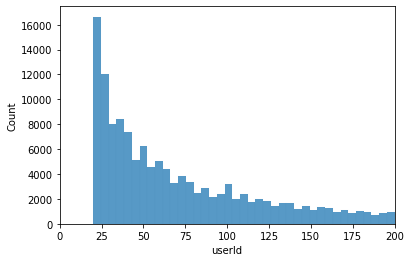

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(x=ratings.userId.value_counts())
plt.xlim(0,200)

In [53]:
ratings.userId.value_counts()

72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
          ...  
52927        20
43931        20
27547        20
27546        20
39653        20
Name: userId, Length: 162541, dtype: int64

In [54]:
ratings['number_reviews'] = ratings.userId.value_counts()
ratings = ratings.dropna(axis=0, subset=['number_reviews'])
ratings.head()

,userId,movieId,rating,timestamp,number_reviews
1,1,306,3.5,1147868817,70.0
2,1,307,5.0,1147868828,184.0
3,1,665,5.0,1147878820,656.0
4,1,899,3.5,1147868510,242.0
5,1,1088,4.0,1147868495,101.0


In [55]:
ratings_1 = ratings.loc[(ratings['number_reviews'] == 50)]

In [56]:
ratings_1.shape

(1418, 5)

In [57]:
ratings_1['number_reviews'].max()

50.0

In [58]:
from scipy.sparse import csr_matrix
from pandas.api.types import CategoricalDtype

movie_c = CategoricalDtype(sorted(ratings_1.movieId.unique()), ordered=True)
user_c = CategoricalDtype(sorted(ratings_1.userId.unique()), ordered=True)

row = ratings_1.userId.astype(user_c).cat.codes
col = ratings_1.movieId.astype(movie_c).cat.codes

sparse_matrix = csr_matrix((ratings_1["rating"], (row, col)), \
                           shape=(user_c.categories.size, movie_c.categories.size))

df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, index=user_c.categories, columns=movie_c.categories)

In [59]:
from sklearn.cluster import MiniBatchKMeans, KMeans

mbkm = KMeans(n_clusters=50)
mbkm.fit(sparse_matrix)

KMeans(n_clusters=50)

In [60]:
print('Number of ones:',(pd.Series(mbkm.labels_).value_counts() == 1).sum())
pd.Series(mbkm.labels_).value_counts()

Number of ones: 40


5     491
40      5
25      5
47      5
42      5
38      4
0       4
32      4
3       3
39      2
17      1
11      1
18      1
16      1
15      1
14      1
13      1
12      1
8       1
10      1
9       1
20      1
7       1
6       1
4       1
2       1
1       1
19      1
49      1
21      1
34      1
46      1
45      1
44      1
43      1
41      1
37      1
36      1
35      1
33      1
22      1
31      1
30      1
29      1
28      1
27      1
26      1
48      1
23      1
24      1
dtype: int64

In [61]:
def make_user(movieId, rating):
    acc = 0
    new_user = pd.DataFrame([np.zeros(1617)], columns=movie_c.categories)
    for id in movieId:
        new_user[id] = rating[acc]
        acc += 1
    return new_user

In [62]:
user = make_user([1,2,3],[1,1,1])

ValueError: 1050 columns passed, passed data had 1617 columns

In [ ]:
mbkm.predict(user)

In [63]:
print(find_title(283))

280    New Jersey Drive (1995)
Name: title, dtype: object


In [64]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100)

svd.fit(sparse_matrix)
sparse_matrix_svd = svd.transform(sparse_matrix)

In [65]:
svd.components_

array([[ 2.01289287e-07,  1.59672690e-02,  1.18745164e-10, ...,
        -3.00630535e-06,  6.19400304e-07,  5.50698013e-07],
       [ 6.54204936e-06, -6.30157888e-08,  4.94978728e-08, ...,
         3.78544206e-06,  9.64532473e-08, -1.81735914e-06],
       [ 1.58560810e-05,  1.87270758e-01, -1.06431660e-08, ...,
         1.16708693e-05, -2.39902251e-06, -2.73683080e-06],
       ...,
       [ 7.89839968e-03,  4.23822838e-04, -3.82634524e-05, ...,
         3.22768853e-02,  3.10153474e-03, -6.61537004e-03],
       [-6.24015400e-02, -3.22008502e-04,  1.15489834e-04, ...,
        -8.53083780e-02, -1.47399465e-03,  1.18550927e-03],
       [ 1.26039802e-02, -4.68949302e-05,  3.22659799e-04, ...,
        -1.11892946e-01,  2.34332826e-03, -1.20946083e-03]])

In [66]:
mbkm = KMeans(n_clusters=500)
mbkm.fit(sparse_matrix_svd)

KMeans(n_clusters=500)

In [67]:
pd.Series(mbkm.labels_).value_counts()

1      60
18      3
287     2
366     2
365     2
       ..
336     1
337     1
338     1
339     1
0       1
Length: 500, dtype: int64

In [68]:
user_svd = svd.transform(user)

mbkm.predict(user_svd)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1050 is different from 59047)

# Training on New Database

In [70]:
ratings = ratings.merge(movies[['movieId','title']],on='movieId')
ratings.head()

,userId,movieId,rating,timestamp,number_reviews,title
0,1,306,3.5,1147868817,70.0,Three Colors: Red (Trois couleurs: Rouge) (1994)
1,7,306,5.0,835444970,27.0,Three Colors: Red (Trois couleurs: Rouge) (1994)
2,25,306,4.0,836217388,22.0,Three Colors: Red (Trois couleurs: Rouge) (1994)
3,47,306,4.0,855094660,25.0,Three Colors: Red (Trois couleurs: Rouge) (1994)
4,79,306,5.0,828708508,113.0,Three Colors: Red (Trois couleurs: Rouge) (1994)


In [71]:
def get_most_rated_movies_df(ratings_df, top_number):
    most_rated_movies = ratings_df.movieId.value_counts().head(top_number).index
    return ratings_df[ratings_df.movieId.isin(most_rated_movies)].copy()

def get_users_with_min_num_of_ratings_df(ratings_df, min_num_of_ratings):
    rates_per_user = ratings.userId.value_counts()
    bolean_users_with_min_num_of_ratings = ratings_df.userId.value_counts() >= min_num_of_ratings
    users_with_min_num_of_ratings = rates_per_user[bolean_users_with_min_num_of_ratings].index
    return ratings_df[ratings_df.userId.isin(users_with_min_num_of_ratings)].copy()


In [72]:
ratings_top = get_most_rated_movies_df(ratings, 1000)
ratings_top

,userId,movieId,rating,timestamp,number_reviews,title
0,1,306,3.5,1147868817,70.0,Three Colors: Red (Trois couleurs: Rouge) (1994)
1,7,306,5.0,835444970,27.0,Three Colors: Red (Trois couleurs: Rouge) (1994)
2,25,306,4.0,836217388,22.0,Three Colors: Red (Trois couleurs: Rouge) (1994)
3,47,306,4.0,855094660,25.0,Three Colors: Red (Trois couleurs: Rouge) (1994)
4,79,306,5.0,828708508,113.0,Three Colors: Red (Trois couleurs: Rouge) (1994)
...,...,...,...,...,...,...
143515,997,204,3.0,1529293256,54.0,Under Siege 2: Dark Territory (1995)
143516,1041,204,1.0,981000454,48.0,Under Siege 2: Dark Territory (1995)
143517,1052,204,3.0,966020116,224.0,Under Siege 2: Dark Territory (1995)
143518,1129,204,3.0,833843141,657.0,Under Siege 2: Dark Territory (1995)


In [73]:
ratings_top_users_top = get_users_with_min_num_of_ratings_df(ratings_top, 200)
ratings_top_users_top

,userId,movieId,rating,timestamp,number_reviews,title
9,171,306,4.5,1088192124,553.0,Three Colors: Red (Trois couleurs: Rouge) (1994)
16,357,306,4.0,1367156902,26.0,Three Colors: Red (Trois couleurs: Rouge) (1994)
27,541,306,4.0,1542827243,21.0,Three Colors: Red (Trois couleurs: Rouge) (1994)
30,649,306,5.0,996856660,20.0,Three Colors: Red (Trois couleurs: Rouge) (1994)
32,734,306,4.0,992789983,110.0,Three Colors: Red (Trois couleurs: Rouge) (1994)
...,...,...,...,...,...,...
143503,805,204,4.0,951091668,22.0,Under Siege 2: Dark Territory (1995)
143509,894,204,1.0,1112244008,86.0,Under Siege 2: Dark Territory (1995)
143515,997,204,3.0,1529293256,54.0,Under Siege 2: Dark Territory (1995)
143517,1052,204,3.0,966020116,224.0,Under Siege 2: Dark Territory (1995)


In [91]:
df = ratings_top_users_top.pivot(index='userId', columns='title', values='rating')
df = df.fillna(0)
df.head()

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),13 Going on 30 (2004),"13th Warrior, The (1999)",2001: A Space Odyssey (1968),21 Grams (2003),21 Jump Street (2012),...,X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Zombieland (2009),Zoolander (2001),Zootopia (2016),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,4.0,4.0,4.0,0.0,0.0,0.0,4.0,3.5,0.0,0.0
12,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,3.5
13,0.0,0.0,0.0,0.0,0.0,0.0,3.5,3.5,0.0,0.0,...,0.0,3.0,3.5,0.0,5.0,3.5,4.0,3.5,0.0,0.0
19,0.0,0.0,2.5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0
23,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ratings_pivot = ratings_top.pivot_table(index='userId', columns='title', values='rating', fill_value=0)
ratings_pivot.head()

In [92]:
def standardize(row):
    new_row = (row - row.mean()) / (row.max() - row.min())
    return new_row


ratings_std = df.apply(standardize)
ratings_std.head()

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),13 Going on 30 (2004),"13th Warrior, The (1999)",2001: A Space Odyssey (1968),21 Grams (2003),21 Jump Street (2012),...,X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Zombieland (2009),Zoolander (2001),Zootopia (2016),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
3,-0.111966,-0.187179,-0.115385,-0.149573,-0.252991,-0.084402,-0.114910,0.5,-0.187179,-0.092308,...,0.740741,0.605983,0.483381,-0.241026,-0.248718,-0.129915,0.657265,0.517094,-0.108547,-0.117094
12,0.488034,0.412821,0.084615,-0.149573,-0.252991,-0.084402,-0.114910,-0.5,-0.187179,-0.092308,...,-0.148148,-0.194017,-0.405508,0.158974,-0.248718,0.670085,-0.142735,-0.182906,-0.108547,0.582906
13,-0.111966,-0.187179,-0.115385,-0.149573,-0.252991,-0.084402,0.662868,0.2,-0.187179,-0.092308,...,-0.148148,0.405983,0.372270,-0.241026,0.751282,0.570085,0.657265,0.517094,-0.108547,-0.117094
19,-0.111966,-0.187179,0.384615,-0.149573,-0.252991,-0.084402,-0.114910,0.5,-0.187179,-0.092308,...,0.296296,0.205983,0.261159,-0.241026,-0.248718,-0.129915,-0.142735,-0.182906,0.591453,-0.117094
23,-0.111966,-0.187179,-0.115385,-0.149573,0.747009,-0.084402,-0.114910,0.3,-0.187179,-0.092308,...,-0.148148,-0.194017,-0.405508,-0.241026,-0.248718,-0.129915,-0.142735,-0.182906,-0.108547,-0.117094


In [93]:
from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(ratings_std.T)
print(item_similarity)

[[ 1.00000000e+00  9.74372145e-02  2.10389546e-02 ... -2.82175683e-02
   1.80968968e-01 -1.36105401e-01]
 [ 9.74372145e-02  1.00000000e+00  2.46932859e-01 ...  2.25156732e-02
   7.30419394e-02  1.05354856e-01]
 [ 2.10389546e-02  2.46932859e-01  1.00000000e+00 ... -9.65587492e-02
   6.11956514e-02 -1.00985566e-04]
 ...
 [-2.82175683e-02  2.25156732e-02 -9.65587492e-02 ...  1.00000000e+00
   1.57981908e-01 -1.15589546e-01]
 [ 1.80968968e-01  7.30419394e-02  6.11956514e-02 ...  1.57981908e-01
   1.00000000e+00 -8.91968148e-02]
 [-1.36105401e-01  1.05354856e-01 -1.00985566e-04 ... -1.15589546e-01
  -8.91968148e-02  1.00000000e+00]]


In [90]:
item_similarity_df = pd.DataFrame(item_similarity, index=df.columns, columns=df.columns)
item_similarity_df

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),13 Going on 30 (2004),"13th Warrior, The (1999)",2001: A Space Odyssey (1968),21 Grams (2003),21 Jump Street (2012),...,X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Zombieland (2009),Zoolander (2001),Zootopia (2016),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),1.000000,0.191880,0.062406,0.025195,0.037155,0.198976,-0.011697,0.033190,0.097463,0.209629,...,0.202858,0.091677,0.072335,0.115905,-0.017406,0.012874,0.218209,-0.001250,0.200714,0.012055
10 Things I Hate About You (1999),0.191880,1.000000,0.214621,0.254065,0.054063,0.336248,0.163691,0.099644,0.061219,0.124387,...,0.078258,0.139193,0.140697,0.331352,0.072358,0.091817,0.128915,0.135181,0.067116,0.124654
101 Dalmatians (1996),0.062406,0.214621,1.000000,0.328093,0.034956,0.159182,0.071337,0.115145,0.067017,0.037662,...,-0.015266,0.099837,0.060121,0.171179,0.107974,0.087703,0.084860,0.081852,0.022812,0.054481
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.025195,0.254065,0.328093,1.000000,0.170685,0.153688,0.107214,0.127424,0.067544,0.014921,...,-0.018804,0.118776,0.084581,0.259168,0.171092,0.084865,0.068300,0.096888,0.045106,0.169906
12 Angry Men (1957),0.037155,0.054063,0.034956,0.170685,1.000000,0.078521,0.035813,0.312868,0.111516,0.058418,...,0.083231,0.063708,0.077463,0.082512,0.119286,0.107281,0.050089,0.093033,0.059879,0.142070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns (1988),0.012874,0.091817,0.087703,0.084865,0.107281,0.025103,0.092976,0.170654,0.032348,0.000524,...,-0.006439,0.099122,0.104745,0.156050,0.177789,1.000000,0.007009,0.047785,-0.010050,0.337555
Zombieland (2009),0.218209,0.128915,0.084860,0.068300,0.050089,0.094824,0.035097,0.117316,0.110860,0.378023,...,0.392994,0.226318,0.210161,0.037046,0.060167,0.007009,1.000000,0.156926,0.296301,-0.047952
Zoolander (2001),-0.001250,0.135181,0.081852,0.096888,0.093033,0.084585,0.091887,0.117233,0.174869,0.156160,...,0.120157,0.233343,0.247270,0.163074,0.152578,0.047785,0.156926,1.000000,0.125106,0.055568


In [116]:
def get_similar_movies(movie_name,user_rating):
    similar_score = item_similarity_df[movie_name]*(user_rating-2.5)
    similar_score = similar_score.sort_values(ascending=False)
    
    
    return similar_score

print(get_similar_movies("Interstellar (2014)",5))

title
Interstellar (2014)              2.500000
The Martian (2015)               1.550826
Inception (2010)                 1.445749
Edge of Tomorrow (2014)          1.376697
Dark Knight Rises, The (2012)    1.371525
                                   ...   
Quiz Show (1994)                -0.305457
Batman Forever (1995)           -0.306530
Star Trek: Generations (1994)   -0.313655
Sleepless in Seattle (1993)     -0.322248
Dances with Wolves (1990)       -0.346277
Name: Interstellar (2014), Length: 1000, dtype: float64


In [118]:
action_lover = [("21 Jump Street (2012)",5),("(500) Days of Summer (2009)",1),("10 Things I Hate About You (1999)",1),("Pulp Fiction (1994)",5)]

similar_movies = pd.DataFrame()

for movie,rating in action_lover:
    similar_movies = similar_movies.append(get_similar_movies(movie,rating),ignore_index=True)
    
similar_movies.head()
similar_movies.sum().sort_values(ascending=False)


Pulp Fiction (1994)                  2.443346
21 Jump Street (2012)                2.069065
Seven (a.k.a. Se7en) (1995)          1.283227
Reservoir Dogs (1992)                1.215061
Usual Suspects, The (1995)           1.164483
                                       ...   
Double Jeopardy (1999)              -0.440796
101 Dalmatians (1996)               -0.504890
Never Been Kissed (1999)            -0.735204
(500) Days of Summer (2009)         -1.043513
10 Things I Hate About You (1999)   -1.485851
Length: 1000, dtype: float64